# Лабораторная работа № 1: Bias-Variance decomposition
Глушков Александр М21-524
Вариант 1-01

1. Построить графики зависимости среднеквадратичной ошибки (MSE) модели на обучающей и тестовой выборках от параметра m (числа регрессоров в регрессионной модели).

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m_max = 30

In [3]:
df = pd.read_csv("data_v1-01.csv")

In [4]:
df.head()

,x,y
0,2.28750,-0.42185
1,0.76879,4.46150
2,-0.73421,4.39510
3,-2.12020,2.14640
4,-2.01430,-2.25580


In [5]:
df.describe()

,x,y
count,300.000000,300.000000
mean,-0.000178,0.907282
std,1.437335,2.540319
min,-2.476800,-4.940000
25%,-1.293675,-0.912722
50%,-0.048087,0.912895
75%,1.276550,2.719525
max,2.480700,6.987700


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


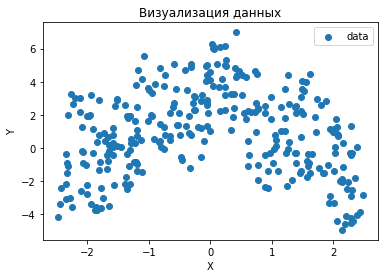

In [7]:
plt.title('Визуализация данных')
plt.scatter(df['x'].values, df['y'].values, label='data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=9)

X = df['x'].values
y = df['y'].values

X_train = df_train['x'].values
y_train = df_train['y'].values

X_test = df_test['x'].values
y_test = df_test['y'].values

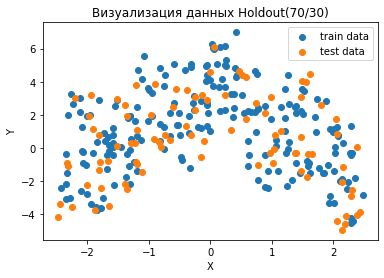

In [9]:
plt.title('Визуализация данных Holdout(70/30)')
plt.scatter(X_train, y_train, label='train data')
plt.scatter(X_test, y_test, label='test data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
models = []
for i in range(1, m_max + 1):
    model = LinearRegression()
    model.fit(np.array([X_train ** (j + 1) for j in range(i)]).T, y_train[..., None])
    models.append(model)

In [11]:
params = []
predictions = []
train_predictions = []
test_predictions = []
for i, model in enumerate(models):
    params.append((model.intercept_[0], model.coef_[0]))
    predictions.append(model.predict(np.array([X ** (j + 1) for j in range(i + 1)]).T))
    train_predictions.append(model.predict(np.array([X_train ** (j + 1) for j in range(i + 1)]).T))
    test_predictions.append(model.predict(np.array([X_test ** (j + 1) for j in range(i + 1)]).T))

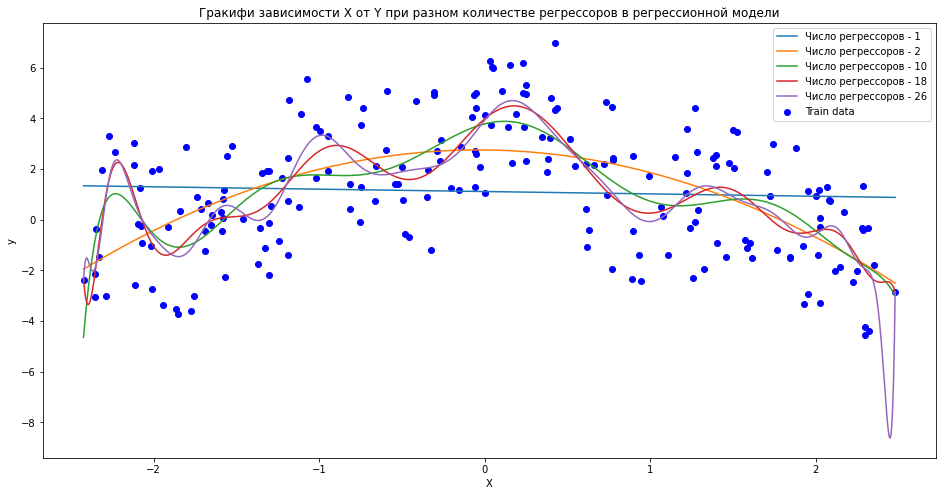

In [12]:
plt.figure(figsize=(16, 8))
indexes = [0] + [i for i in range(1, m_max, 8)]
x_ax = np.linspace(min(X_train), max(X_train), 1000)
for idx in indexes:
    a, bs = params[idx]
    f = lambda x: a + sum([bs[i] * x ** (i + 1) for i in range(len(bs))])
    plt.plot(x_ax, f(x_ax), label=f"Число регрессоров - {idx + 1}")

plt.scatter(X_train, y_train, color='b', label="Train data")
plt.title("Гракифи зависимости X от Y при разном количестве регрессоров в регрессионной модели")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

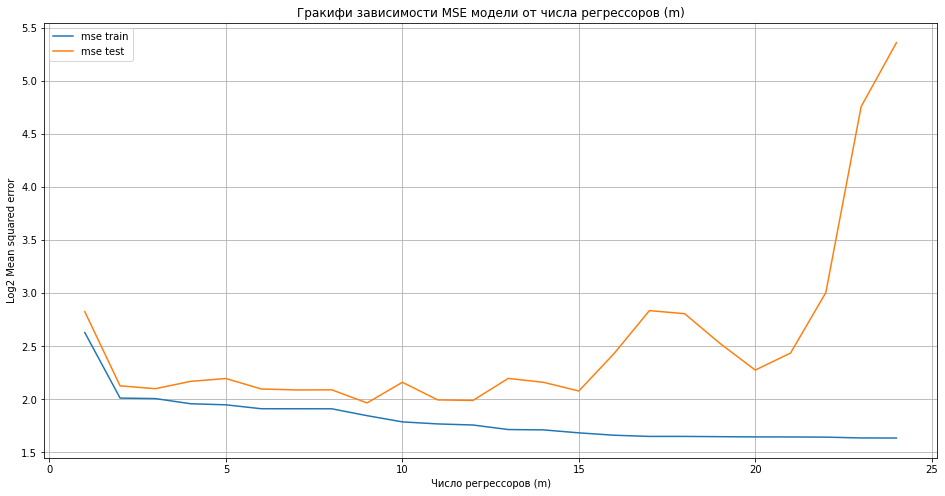

In [13]:
mse_train = []
mse_test = []
m = min(24, m_max)
for param in params[:m]:
    a, bs = param
    f = lambda x: a + sum([bs[i] * x ** (i + 1) for i in range(len(bs))])
    mse_train.append(np.mean((f(X_train) - y_train) ** 2))
    mse_test.append(np.mean((f(X_test) - y_test) ** 2))

plt.figure(figsize=(16, 8))
plt.plot(range(1, m + 1), np.log2(mse_train), label="mse train")
plt.plot(range(1, m + 1), np.log2(mse_test), label="mse test")
plt.title("Гракифи зависимости MSE модели от числа регрессоров (m)")
plt.legend()
plt.xlabel("Число регрессоров (m)")
plt.ylabel("Log2 Mean squared error")
plt.grid()
plt.show()

2. Построить графики зависимости выхода модели от x, наложенные на диаграмму рассеяния, для случаев: а) слишком простой модели; б) переобучения; в) хорошей обобщающей способности.

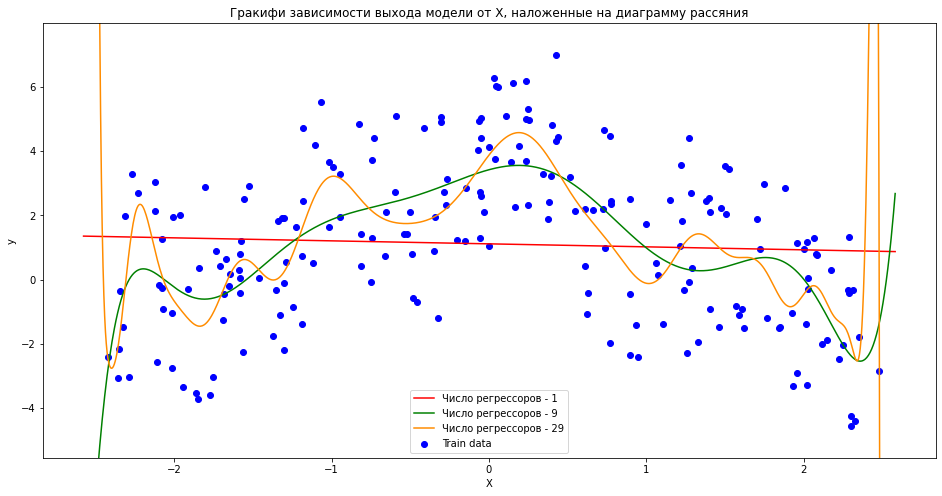

In [14]:
f, ax = plt.subplots(figsize=(16, 8))
plt.scatter(X_train, y_train, color='b', label="Train data")
indexes = [0, 8, 28]
colors = ['r', 'g', 'darkorange']
x_ax = np.linspace(min(X) - 0.1, max(X) + 0.1, 1000)
for idx, color in zip(indexes, colors):
    a, bs = params[idx]
    f = lambda x: a + sum([bs[i] * x ** (i + 1) for i in range(len(bs))])
    ax.plot(x_ax, f(x_ax), color=color, label=f"Число регрессоров - {idx + 1}")

plt.title("Гракифи зависимости выхода модели от X, наложенные на диаграмму рассяния")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
ax.set_ybound(min(y_train) - 1, max(y_train) + 1)
plt.show()

3. Построить графики зависимостей среднеквадратичной ошибки модели на обучающей и тестовой выборках от объёма обучающей выборки для нескольких фиксированных m.

In [15]:
m = [1, 4, 9]
train_sizes = []
mse_trains = []
mse_tests = []
df_train, df_test = train_test_split(df, train_size=0.7, random_state=9)
x_te, y_te = df_test['x'].values, df_test['y'].values
for ts in np.arange(0.1, 1.0, 0.05):
    # local_df_train, _ = train_test_split(df_train, train_size=ts, random_state=7)
    local_df_train = df_train[:int(ts * len(df_train))]
    x_tr, y_tr = local_df_train['x'].values, local_df_train['y'].values
    models = []
    mse_train = []
    mse_test = []
    params = []
    for count_of_regressors in m:
        model = LinearRegression()
        model.fit(np.array([x_tr ** (j + 1) for j in range(count_of_regressors)]).T, y_tr[..., None])
        models.append(model)
        params.append((model.intercept_[0], model.coef_[0]))
    for param in params:
        a, bs = param
        f = lambda x: a + sum([bs[i] * x ** (i + 1) for i in range(len(bs))])
        mse_train.append(np.mean((f(x_tr) - y_tr) ** 2))
        mse_test.append(np.mean((f(x_te) - y_te) ** 2))
    mse_trains.append(mse_train)
    mse_tests.append(mse_test)
    train_sizes.append(ts)

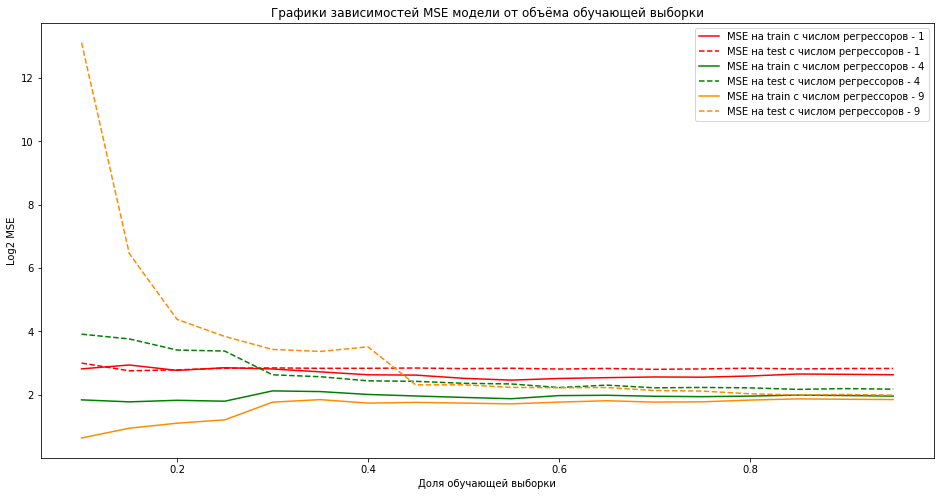

In [16]:
mse_trains = np.array(mse_trains)
mse_tests = np.array(mse_tests)
plt.figure(figsize=(16, 8))
colors = ['r', 'g', 'darkorange']
for i, (count_of_regressors, color) in enumerate(zip(m, colors)):
    plt.plot(train_sizes, np.log2(mse_trains[:, i]), color=color, label=f"MSE на train с числом регрессоров - {count_of_regressors}")
    plt.plot(train_sizes, np.log2(mse_tests[:, i]),'--', color=color, label=f"MSE на test с числом регрессоров - {count_of_regressors}")
plt.title("Графики зависимостей MSE модели от объёма обучающей выборки")
plt.legend()
plt.xlabel("Доля обучающей выборки")
plt.ylabel("Log2 MSE")
plt.show()

4. Для фиксированного m оценить дисперсию отклика модели и смещение выхода модели (по различным обучающим выборкам) при каждом фиксированном x, по полученным данным построить графики зависимости дисперсии и смещения от x, а также гистограммы распределения дисперсий и смещений для обучающей и тестовой выборок.  
`Смещения в пп.4,5 считать относительно усредненной (по различным обучающим выборкам) функции регрессии при m = 4.`

In [17]:
m = 4
params = []
df_train, df_test = train_test_split(df, train_size=0.7)
x_te, y_te = df_test['x'].values, df_test['y'].values
for _ in range(1000):
    local_df_train, local_df_test = train_test_split(df_train, train_size=0.7)
    x_tr, y_tr = local_df_train['x'].values, local_df_train['y'].values
    
    model = LinearRegression()
    model.fit(np.array([x_tr ** (j + 1) for j in range(m)]).T, np.array(y_tr)[..., None])
    params.append((model.intercept_[0], model.coef_[0]))

In [18]:
preds = []
train_preds = []
test_preds = []
for param in params:
    a, bs = param
    f = lambda x: a + sum([bs[i] * x ** (i + 1) for i in range(len(bs))])
    preds.append(f(X))
    train_preds.append(f(X_train))
    test_preds.append(f(X_test))
preds = np.array(preds)
train_preds = np.array(train_preds)
test_preds = np.array(test_preds)

In [19]:
mean_pred = np.mean(preds, axis=0)
mean_pred.shape

(300,)

In [20]:
bias = mean_pred - y

In [21]:
sorted_x, sorted_bias = zip(*sorted(zip(X, bias), key=lambda x: x[0]))

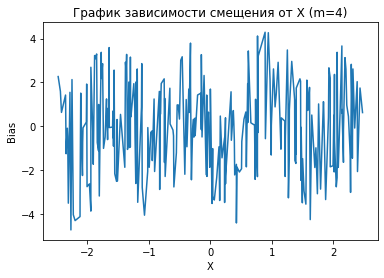

In [22]:
plt.title("График зависимости смещения от X (m=4)")
plt.plot(sorted_x, sorted_bias)
plt.xlabel("X")
plt.ylabel("Bias")
plt.show()

In [23]:
variance = np.var(preds, axis=0)

In [24]:
sorted_x, sorted_variance = zip(*sorted(zip(X, variance), key=lambda x: x[0]))

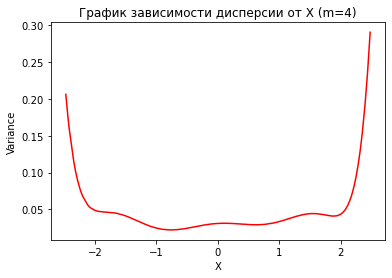

In [25]:
plt.title("График зависимости дисперсии от X (m=4)")
plt.plot(sorted_x, sorted_variance, color='r')
plt.xlabel("X")
plt.ylabel("Variance")
plt.show()

In [26]:
train_mean_pred = np.mean(train_preds, axis=0)
train_bias = train_mean_pred - y_train
train_variance = np.var(train_preds, axis=0)

test_mean_pred = np.mean(test_preds, axis=0)
test_bias = test_mean_pred - y_test
test_variance = np.var(test_preds, axis=0)

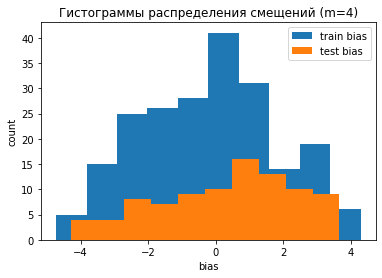

In [27]:
plt.title("Гистограммы распределения смещений (m=4)")
plt.hist(train_bias, label='train bias', bins=10)
plt.hist(test_bias, label='test bias', bins=10)
plt.legend()
plt.xlabel("bias")
plt.ylabel("count")
plt.show()

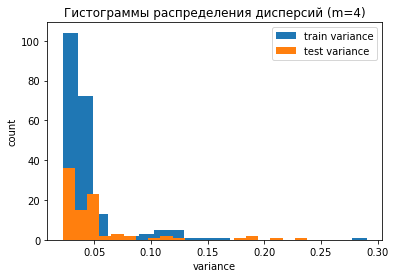

In [28]:
plt.title("Гистограммы распределения дисперсий (m=4)")
plt.hist(train_variance, label='train variance', bins=20)
plt.hist(test_variance, label='test variance', bins=20)
plt.legend()
plt.xlabel("variance")
plt.ylabel("count")
plt.show()

5. Построить графики зависимости дисперсии отклика модели и смещения выхода модели от параметра m при некоторых фиксированных x.  
`Смещения в пп.4,5 считать относительно усредненной (по различным обучающим выборкам) функции регрессии при m = 4.`

In [29]:
from tqdm.auto import tqdm

In [30]:
bias = []
variance = []

df_train, df_test = train_test_split(df, train_size=0.7, random_state=9)
X_test_bv, y_test_bv = df_test['x'].values, df_test['y'].values

for m in tqdm(range(1, m_max), total=(m_max - 1)):
    params = []
    for _ in range(100):
        local_df_train, local_df_test = train_test_split(df_train, train_size=0.7)
        x_tr, y_tr = local_df_train['x'].values, local_df_train['y'].values
        x_te, y_te = local_df_test['x'].values, local_df_test['y'].values

        model = LinearRegression()
        model.fit(np.array([x_tr ** (j + 1) for j in range(m)]).T, np.array(y_tr)[..., None])
        params.append((model.intercept_[0], model.coef_[0]))
        
    preds = []
    for param in params:
        a, bs = param
        f = lambda x: a + sum([bs[i] * x ** (i + 1) for i in range(len(bs))])
        preds.append(f(X_test_bv))
    preds = np.array(preds)
    
    bias.append(np.mean(np.mean(preds, axis=0) - y_test_bv))
    variance.append(np.mean(np.var(preds, axis=0)))

  0%|          | 0/29 [00:00<?, ?it/s]

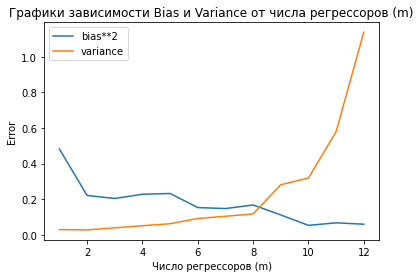

In [31]:
k = 12
plt.title("Графики зависимости Bias и Variance от числа регрессоров (m)")
plt.plot(range(1, k + 1), np.array(bias[:k]) ** 2, label='bias**2')
plt.plot(range(1, k + 1), variance[:k], label='variance')
plt.legend()
plt.xlabel("Число регрессоров (m)")
plt.ylabel("Error")
plt.show()

6. Сделать вывод о связи дисперсии и смещения выхода модели и параметра m.

* При увеличении числа регрессоров ошибка на обучающей выборке уменьшается;
* Высокий _bias_ говорит об underfitting;
* Высокий _variance_ говорит об overfitting;
* Как и ожидалось, при увеличении числа регрессоров `m` _bias_ уменьшается, тогда как _variance_ увеличивается.